In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error, SCORERS
import scipy as sp
from joblib import dump,load
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNetCV

# Feature Engineering

This is the process of using domain knowledge to extract features through data mining.

## Extracting information:

- Considering a dataset with timestamps for each row

    - For us to work with this data we need to convert it to a numerical expression

- Now considering a dataset with long text data, we could think about extracting information such as

    - Length of text
    - Number of times certain words are mentioned

## Combining Information


- We can combine given information or extracted information.
    - Here we can get a new feature with 0 or 1 values indicating a combination of two other features.

## Transforming Information

- Very common for string data as most algorithms can't accept string data.
    - Let's say we have a feature where we encode country codes. We can transform it using:
        > **Integer Encoding:** 
        > - Directly converts categories into integers. 
        > - This may or may not work depeding on the feature and the domain.
        > - For this case it wont work, but if we think  of it in the case for a spice level for a sauce it would make sense.
        
        > **One-hot Encoding:** 
        > - It creates features using 0 and 1 for every single category for that feature. Meaning it will create more columns in our data.
        > - It requires a lot of tuning  and domain experience to choose the categories correctly.
        > - Considering a binary (up down) feature it will give us two inverted features giving us redundant data, this can be fixed by dropping the redundant data.
        > - It is also difficult to add new categories, as we have to update the amount of columns used.





# Dealing with outliers

Often a dataset will have a few extreme outliers and its beetter to simply remove them to have a more generalized model.

What should we consider for it?
>- Range and Limits
>- Percentage of Data

We need to use some methodology such as:
>- InterrQuartile Range
>- Standard Deviation
>- Domain Limit Value

Things to consider:
>- Percentage of Data
>   - If a large percentage of the data is being labeled as an outlier it means we have a wide distribution.
>   - We should have a few percentage points of outliers.
>- Utilize visualization plots to identify outliers.
>- It will create caveats for future models.

Lets create a random distributioon of ages to work with.

In [8]:
def create_ages(mu=50, sigma=13, num_samples=100, seed=42):
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)

    return sample_ages

In [9]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

We  can see the normal distribution, identifyiing possible outliers at around 20 and 70 years old.

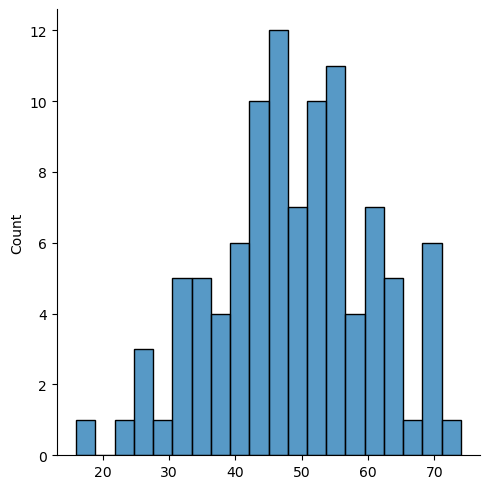

In [11]:
sns.displot(sample, bins=20)

But checking the box plot we can see that the biggets outlier is below 20.

c:\Users\aguil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

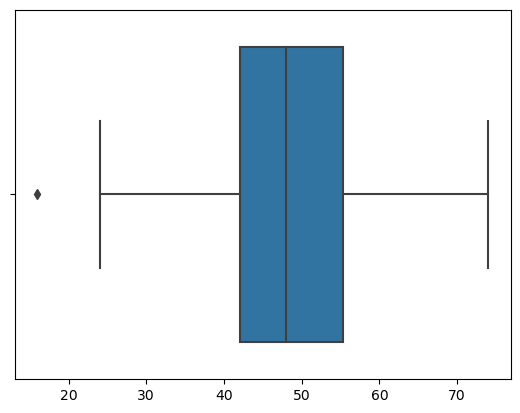

In [12]:
sns.boxplot(sample)

But how can we identify it in a more mathematical way.

We can transform it into a pandas series. And check the IQR, which is the range between the 25% and 75%.

In [14]:
ser = pd.Series(sample)

ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

We can see thatt our lower limit is 22.13, meaning that everything below is an outtlier.

In [15]:
IQR = 55.25 - 42
Lower_lim = 42.0 - 1.5*IQR
Lower_lim

22.125

We can remove these outliers by doing the following:

In [16]:
ser[ser > Lower_lim]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

We can get the IQR the following way:

In [20]:
q75,q25 =  np.percentile(sample,[75,25])

IQR  = q75 -  q25

Lower_lim =  q25 - 1.5*IQR

Lower_lim

22.125

Let's work with a full dataset. For this let's import it, and lets check its correlatio based on it's sale price.

In [27]:
df = pd.read_csv('E:\Machine Learning\DATA\Ames_Housing_Data.csv')
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

We can see that Overall Qual is the most strongly coorrelated value to Sale Price.

We can see that our correlation is between 1 and 10, and we can also see a few outliers in our data.

We can identify that some houses are of a good quality but they are  selling for a really low price.

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

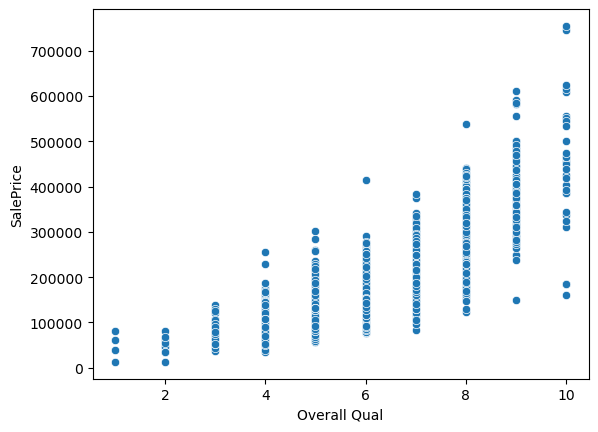

In [28]:
sns.scatterplot(data=df,x='Overall Qual', y='SalePrice')

Let's check the living area no, as it is  the second most correlated.

Here we can see the same outliers that have a low selling point, but a large living area.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

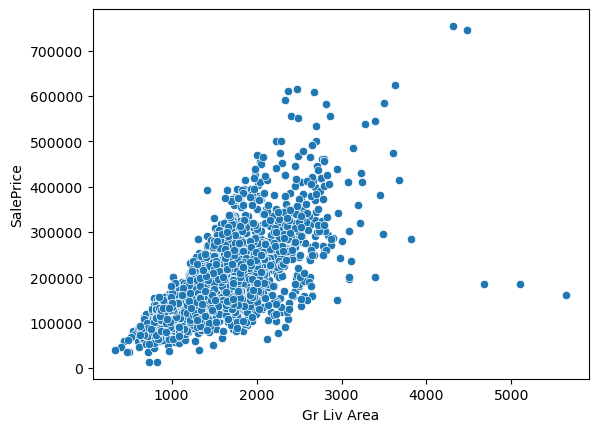

In [29]:
sns.scatterplot(data=df,x='Gr Liv Area', y='SalePrice')